# 4a. Analyzing Country and Year Distribution of Abstract Corpus

## Introduction

This Notebook **analyzes and compares the country and year distribution of both our retracted and non-retracted papers**. Its purpose consists of making sure that the distribution is similar in both cases, as required to avoid biases that would compromise our detection tool.

The Notebook uses the abstracts for retracted and non-retracted papers that were extracted in **Notebook 2c** and **Notebook 3c**, respectively, and it produces no output. 

The **workflow** has thus been set as follows:

- Input: **two .csv files** with abstracts from retracted papers and non-retracted papers, respectively. 
- Output: **none**.


## Input/Output Parameters:

Input parameters:

In [6]:

# File path to abstracts of retracted papers

file_path_retracted = '../data/abstracts/cell_biology/retracted/retracted_cell_biology_abstracts.csv'

# File path to abstracts of non-retracted papers

file_path_non_retracted = '../data/abstracts/cell_biology/non_retracted/non_retracted_cell_biology_abstracts.csv'


Output path:

In [29]:
output_path = "../data/final_corpus.csv"

## Importing Libraries

In [4]:

# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Retracted Papers: Loading and Processing Abstracts

Let us start by loading the abstracts of our retracted papers into a data frame:

In [15]:

# Load abstracts of non-retracted papers from .csv file

df_retracted = pd.read_csv(file_path_retracted, delimiter='|')

# Visualize first few entries in data frame

df_retracted.head()


,abstract_text,target,doi,country,year,ret_flag
0,"""Vascular endothelial growth factor receptor-1...",1,10.1371_journal.pone.0065217,CN,2013,False
1,"""Type 1 diabetes mellitus (T1DM) is a systemic...",1,10.1002_ptr.6533,CN,2019,False
2,"""The study was designed to elucidate the regul...",1,10.1002_jcb.29429,CN,2019,False
3,"""Hepatocellular carcinoma (HCC) is the third l...",1,10.1155_2014_486407,TW,2014,False
4,"""BACKGROUND Retinoblastoma is a rare malignanc...",1,10.12659_MSM.914242,CN,2019,False


Retracted papers sometimes include "retraction notices" in their abstract, stating that the paper in question has been removed. These notices typically include words such as "retracted" etc. which would cause data leakeage if we were to feed them as data for our model. We will thus drop all such papers from our data frame, leaving papers for which no retraction notices has been left only:

In [16]:

# Drop rows where 'ret_flag' is True directly from the main DataFrame

df_retracted = df_retracted[df_retracted['ret_flag'] != True]

# Display the cleaned DataFrame to verify the rows are dropped

df_retracted

,abstract_text,target,doi,country,year,ret_flag
0,"""Vascular endothelial growth factor receptor-1...",1,10.1371_journal.pone.0065217,CN,2013,False
1,"""Type 1 diabetes mellitus (T1DM) is a systemic...",1,10.1002_ptr.6533,CN,2019,False
2,"""The study was designed to elucidate the regul...",1,10.1002_jcb.29429,CN,2019,False
3,"""Hepatocellular carcinoma (HCC) is the third l...",1,10.1155_2014_486407,TW,2014,False
4,"""BACKGROUND Retinoblastoma is a rare malignanc...",1,10.12659_MSM.914242,CN,2019,False
...,...,...,...,...,...,...
6996,"""Abstract A nanodrug delivery system of paclit...",1,10.1186_s11671-017-1826-1,CN,2017,False
6997,"""In the present study hsa-miR-424-5p mimic pl...",1,10.1042_BSR20193800,CN,2020,False
6998,"""Expression of the oncogenic protein tyrosine ...",1,10.1128_mcb.13.8.5112-5121.1993,US,1993,False
6999,"""Aberrant methylation of the 5' gene promoter ...",1,10.1158_1078-0432.CCR-03-0716,US,2004,False


## Non-Retracted Papers: Loading and Processing Abstracts

Let us now turn our attention to our non-retracted papers. Let us start by loading the .csv file with the text of non-retracted papers into a new dataframe:

In [17]:

# Load the .csv file with abstract for non-retracted papers into data frame

df_non_retracted = pd.read_csv(file_path_non_retracted, delimiter='|')

# Display first few rows of data frame

df_non_retracted.head()


,abstract_text,target,doi,country,year,ret_flag
0,"""Src kinase mediates growth factor signaling a...",0,10.1073_pnas.0701077104,US,2007,False
1,"""Histidine-rich calcium binding protein (HRC) ...",0,10.7150_ijms.60610,CN,2021,False
2,"""Significance Animal cells undergo a remarkabl...",0,10.1073_pnas.1420585112,GB,2015,False
3,"""Inositol-requiring enzyme 1 (IRE1) is the mos...",0,10.1074_jbc.m110.199737,US,2011,False
4,"""Abstract Hepatocellular carcinoma (HCC) is th...",0,10.1038_s41388-020-01417-6,CN,2020,False


And we then drop those papers to retain only papers without words such as "retracted" etc. in our data frame:

In [18]:

# Drop rows where 'ret_flag' is True 

df_non_retracted = df_non_retracted[df_non_retracted['ret_flag'] != True]

# Display resulting data frame

df_non_retracted.head()


,abstract_text,target,doi,country,year,ret_flag
0,"""Src kinase mediates growth factor signaling a...",0,10.1073_pnas.0701077104,US,2007,False
1,"""Histidine-rich calcium binding protein (HRC) ...",0,10.7150_ijms.60610,CN,2021,False
2,"""Significance Animal cells undergo a remarkabl...",0,10.1073_pnas.1420585112,GB,2015,False
3,"""Inositol-requiring enzyme 1 (IRE1) is the mos...",0,10.1074_jbc.m110.199737,US,2011,False
4,"""Abstract Hepatocellular carcinoma (HCC) is th...",0,10.1038_s41388-020-01417-6,CN,2020,False


## Analyzing Country and Year Distribution of all Papers

Now that the entire corpus that we will use to train our model is ready, we can also obtain the year and country distribution for both our retracted and our non-retracted papers, and see if it matches. We can do that both by creating a plot:

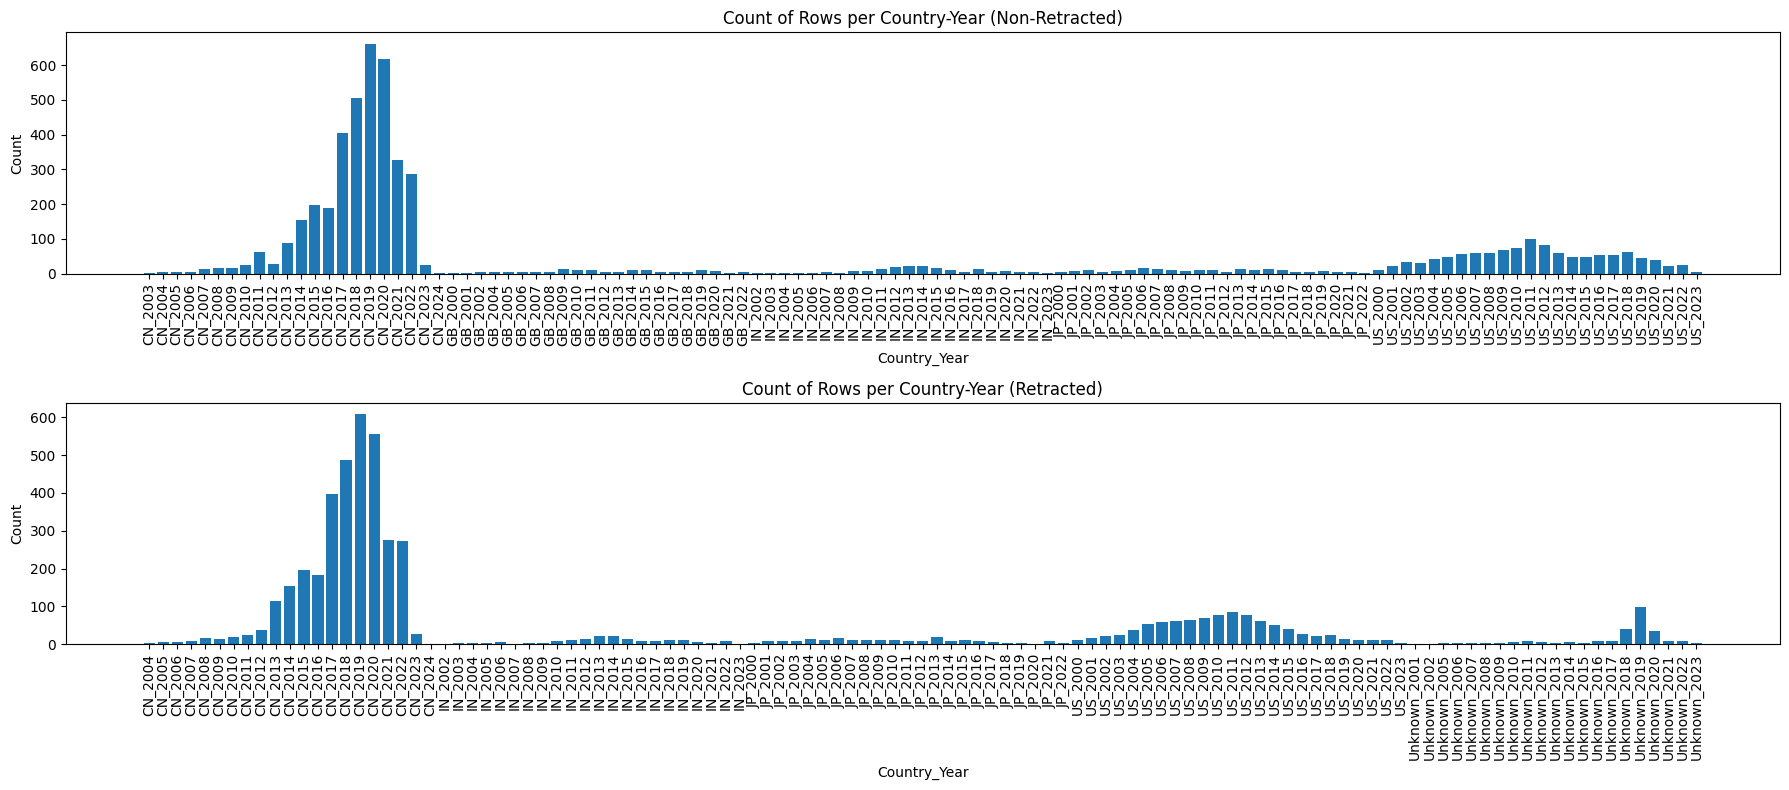

In [25]:

# Exclude papers published before the year 2000

df_non_retracted = df_non_retracted[df_non_retracted['year'] >= 2000]
df_retracted = df_retracted[df_retracted['year'] >= 2000]

# Calculate counts per year and country for non-retracted papers

nonretracted_counts = df_non_retracted.groupby(['country', 'year']).size().reset_index(name='non_retracted_count')

# Calculate counts per year and country for retracted papers

retracted_counts = df_retracted.groupby(['country', 'year']).size().reset_index(name='retracted_count')

# Select top 5 countries with the highest counts

top_nonretracted_countries = nonretracted_counts.groupby('country').sum().nlargest(5, 'non_retracted_count').index
top_retracted_countries = retracted_counts.groupby('country').sum().nlargest(5, 'retracted_count').index

# Filter dataframes to include only top 5 countries

filtered_nonretracted_df = nonretracted_counts[nonretracted_counts['country'].isin(top_nonretracted_countries)]
filtered_retracted_df = retracted_counts[retracted_counts['country'].isin(top_retracted_countries)]

# Plotting cleaned_nonretracted_df

plt.figure(figsize=(18, 8))

# First subplot for cleaned_nonretracted_df
plt.subplot(2, 1, 1)
plt.bar(filtered_nonretracted_df['country'] + '_' + filtered_nonretracted_df['year'].astype(str), filtered_nonretracted_df['non_retracted_count'])
plt.title('Count of Rows per Country-Year (Non-Retracted)')
plt.xlabel('Country_Year')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Second subplot for cleaned_retracted_df

plt.subplot(2, 1, 2)
plt.bar(filtered_retracted_df['country'] + '_' + filtered_retracted_df['year'].astype(str), filtered_retracted_df['retracted_count'])
plt.title('Count of Rows per Country-Year (Retracted)')
plt.xlabel('Country_Year')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


And by creating a data frame with the exact difference between retracted and non-retracted papers for each specific year and country bucket:

In [27]:

# Merge the dataframes

merged_df = nonretracted_counts.merge(retracted_counts, on=['country', 'year'], how='outer').fillna(0)

# Calculate the difference

merged_df['difference'] = merged_df['non_retracted_count'] - merged_df['retracted_count']

# Count occurrences per year for retracted dataframe

retracted_counts_per_year = cleaned_retracted_df.groupby('year').size().reset_index(name='retracted_count')

# Merge with the country information

retracted_counts_per_year = retracted_counts_per_year.merge(cleaned_retracted_df[['year', 'country']], on='year', how='left')

# Calculate total retracted count per country and sort

sorted_countries = retracted_counts_per_year.groupby('country')['retracted_count'].sum().sort_values(ascending=False).index

# Create a dataframe for sorted countries

sorted_df = pd.DataFrame({'country': sorted_countries})

# Merge with original dataframe to retain country-year information

final_df = sorted_df.merge(merged_df, on='country', how='left')

# Display the dataframe

final_df.head(50)



,country,year,non_retracted_count,retracted_count,difference
0,CN,2003,1.0,0.0,1.0
1,CN,2004,4.0,3.0,1.0
2,CN,2005,5.0,5.0,0.0
3,CN,2006,5.0,5.0,0.0
4,CN,2007,12.0,7.0,5.0
5,CN,2008,15.0,16.0,-1.0
6,CN,2009,16.0,14.0,2.0
7,CN,2010,26.0,18.0,8.0
8,CN,2011,62.0,23.0,39.0
9,CN,2012,29.0,37.0,-8.0


## Output

Finally, we can go ahead and generate one data set with the entire corpus that we will use to train our data set:

In [28]:

# Concatenating both dataframes

abstracts_df = pd.concat([df_retracted, df_non_retracted], ignore_index=True)

# Optionally, you can shuffle the rows if you want

abstracts_df = abstracts_df.sample(frac=1).reset_index(drop=True)

#make sure target is a integer
abstracts_df['target'] = abstracts_df['target'].astype(int)

# Print the combined dataframe
abstracts_df


,abstract_text,target,doi,country,year,ret_flag
0,"""Holliday Junction Recognition Protein (HJURP)...",0,10.7150_ijbs.30904,CN,2019,False
1,"""Laryngeal carcinoma (LC) is one of the common...",1,10.1155_2021_5614861,CN,2021,False
2,"""Hepatitis C virus (HCV)-induced human hepatoc...",0,10.3892_ol.2018.8221,CN,2018,False
3,"""Recessive dystrophic epidermolysis bullosa (R...",0,10.1080_2000656x.2019.1661846,CN,2019,False
4,"""Several microRNAs (miRNAs or miRs) regulate c...",1,10.1152_ajpcell.00576.2019,CN,2020,False
...,...,...,...,...,...,...
12780,"""Background. The purpose of this study was to ...",1,10.1155_2022_7723425,CN,2022,False
12781,"""Black yeast members of the Herpotrichiellacea...",0,10.1007_s00248-010-9651-4,CN,2010,False
12782,"""We have recently shown the roles of an autoph...",1,10.4161_auto.29414,Unknown,2014,False
12783,"""Abstract Tongue squamous cell carcinoma (TSCC...",1,10.1002_jcb.27206,CN,2018,False


And save the resulting data frame into a .csv file for future use:

In [33]:

# Save content of data frame to .csv

abstracts_df.to_csv(output_path, sep=',', index=False)
